## Simple 2D Point Classifier
This sample program shows how the classification work. It trains on set of 2D points that are assigned to one of three classes (0,1,2) received from Processing.

It also shows the probability distribution for all 2D points.

Use Sample_Classifier2D sketch in Processing.

In [17]:
#install a required library to use OSC protocol
!pip install pyosc

In [1]:
#setup OSC Protocol to communicate with Processing
import OSCHelper
from OSC import OSCMessage
server=OSCHelper.createServer(9000)
client=OSCHelper.createClient(4200)

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model

#function used to define model architecture
#nbclasses: number of classes used to train
#firstLayer: number of neurons used for the first layer
#layers: array of neurons for the hidden layers (can be none using default [])
def create_model(nbclasses,firstLayer,layers=[]):
    model=models.Sequential()
    model.add(Dense(firstLayer,activation='relu',input_shape=(2,)))
    for l in layers:
        model.add(Dense(l,activation='relu'))
    model.add(Dense(nbclasses,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

#this function will send model probabilities as an image to processing
def SendProb(model):
    _W=32
    _H=32
    for i in range(_W):
        for j in range(_H):
            X=i/float(_W)
            Y=j/float(_H)
            P=[X,Y]
            res=model.predict(np.array([P]))
            #res=np.argmax(res)
            msg=OSCMessage("/result")
            ret=[X,Y]
            ret.extend(list(res))
            msg.append(ret)
            client.send( msg )

In [19]:
X_train=[]
Y_train=[]

def onOSC_Sample(path, tags, args, source):
    X=args[0]
    Y=args[1]
    C=args[2]
    
    X_train.append([X,Y])
    Y_train.append(C)
    #print("new sample:{0},{1}:{2}".format(X,Y,C))

#setup custom handler for the new samples
server.addMsgHandler( "/inputs/sample", onOSC_Sample )

#run OSC server to listen for training samples
OSCHelper.start_server(server)

In [20]:
import random
import numpy as np
from tensorflow.keras import utils

#shuffle the captured samples
samples=list(zip(X_train,Y_train))
random.shuffle(samples)
X_train[:],Y_train[:]=zip(*samples)

nbclasses=3 #this model has three classes to recognize

#convert labels from numbers to one-hot encoding for training
#0 --> [1,0,0]
#1 --> [0,1,0]
#2 --> [0,0,1]
y_train=utils.to_categorical(Y_train,num_classes=nbclasses)

#create a model
model=create_model(nbclasses,10,[])
histories=[]
#train the model
for i in range(50):
    history=model.fit(np.array(X_train),np.array(y_train),epochs=100,batch_size=16) #run one training cycle with 100 epochs
    histories.append(history.history)
    SendProb(model) #send the new probablities

Epoch 1/100
59/59 [==============================] - 1s 9ms/step - loss: 1.0806 - acc: 0.4237
Epoch 2/100
59/59 [==============================] - 0s 229us/step - loss: 1.0763 - acc: 0.4237
Epoch 3/100
59/59 [==============================] - 0s 259us/step - loss: 1.0724 - acc: 0.4237
Epoch 4/100
59/59 [==============================] - 0s 482us/step - loss: 1.0683 - acc: 0.4237
Epoch 5/100
59/59 [==============================] - 0s 349us/step - loss: 1.0643 - acc: 0.4237
Epoch 6/100
59/59 [==============================] - 0s 219us/step - loss: 1.0608 - acc: 0.4237
Epoch 7/100
59/59 [==============================] - 0s 139us/step - loss: 1.0568 - acc: 0.4237
Epoch 8/100
59/59 [==============================] - 0s 156us/step - loss: 1.0533 - acc: 0.4237
Epoch 9/100
59/59 [==============================] - 0s 144us/step - loss: 1.0492 - acc: 0.4237
Epoch 10/100
59/59 [==============================] - 0s 149us/step - loss: 1.0457 - acc: 0.4237
Epoch 11/100
59/59 [=====================

59/59 [==============================] - 0s 165us/step - loss: 0.7156 - acc: 0.7119
Epoch 70/100
59/59 [==============================] - 0s 166us/step - loss: 0.7140 - acc: 0.7119
Epoch 71/100
59/59 [==============================] - 0s 173us/step - loss: 0.7124 - acc: 0.7119
Epoch 72/100
59/59 [==============================] - 0s 149us/step - loss: 0.7107 - acc: 0.7288
Epoch 73/100
59/59 [==============================] - 0s 157us/step - loss: 0.7091 - acc: 0.7288
Epoch 74/100
59/59 [==============================] - 0s 174us/step - loss: 0.7076 - acc: 0.7288
Epoch 75/100
59/59 [==============================] - 0s 163us/step - loss: 0.7058 - acc: 0.7458
Epoch 76/100
59/59 [==============================] - 0s 164us/step - loss: 0.7042 - acc: 0.7458
Epoch 77/100
59/59 [==============================] - 0s 146us/step - loss: 0.7026 - acc: 0.7458
Epoch 78/100
59/59 [==============================] - 0s 143us/step - loss: 0.7011 - acc: 0.7458
Epoch 79/100
59/59 [=======================

59/59 [==============================] - 0s 198us/step - loss: 0.5064 - acc: 0.8644
Epoch 38/100
59/59 [==============================] - 0s 165us/step - loss: 0.5057 - acc: 0.8644
Epoch 39/100
59/59 [==============================] - 0s 168us/step - loss: 0.5044 - acc: 0.8644
Epoch 40/100
59/59 [==============================] - 0s 157us/step - loss: 0.5035 - acc: 0.8644
Epoch 41/100
59/59 [==============================] - 0s 152us/step - loss: 0.5027 - acc: 0.8644
Epoch 42/100
59/59 [==============================] - 0s 141us/step - loss: 0.5018 - acc: 0.8644
Epoch 43/100
59/59 [==============================] - 0s 146us/step - loss: 0.5006 - acc: 0.8644
Epoch 44/100
59/59 [==============================] - 0s 202us/step - loss: 0.4998 - acc: 0.8644
Epoch 45/100
59/59 [==============================] - 0s 159us/step - loss: 0.4990 - acc: 0.8644
Epoch 46/100
59/59 [==============================] - 0s 154us/step - loss: 0.4980 - acc: 0.8644
Epoch 47/100
59/59 [=======================

59/59 [==============================] - 0s 124us/step - loss: 0.3849 - acc: 0.9322
Epoch 6/100
59/59 [==============================] - 0s 114us/step - loss: 0.3844 - acc: 0.9322
Epoch 7/100
59/59 [==============================] - 0s 137us/step - loss: 0.3839 - acc: 0.9322
Epoch 8/100
59/59 [==============================] - 0s 127us/step - loss: 0.3833 - acc: 0.9322
Epoch 9/100
59/59 [==============================] - 0s 108us/step - loss: 0.3828 - acc: 0.9322
Epoch 10/100
59/59 [==============================] - 0s 111us/step - loss: 0.3822 - acc: 0.9322
Epoch 11/100
59/59 [==============================] - 0s 109us/step - loss: 0.3817 - acc: 0.9322
Epoch 12/100
59/59 [==============================] - 0s 150us/step - loss: 0.3812 - acc: 0.9322
Epoch 13/100
59/59 [==============================] - 0s 137us/step - loss: 0.3807 - acc: 0.9322
Epoch 14/100
59/59 [==============================] - 0s 135us/step - loss: 0.3801 - acc: 0.9322
Epoch 15/100
59/59 [===========================

59/59 [==============================] - 0s 148us/step - loss: 0.3047 - acc: 0.9492
Epoch 74/100
59/59 [==============================] - 0s 127us/step - loss: 0.3043 - acc: 0.9492
Epoch 75/100
59/59 [==============================] - 0s 165us/step - loss: 0.3038 - acc: 0.9492
Epoch 76/100
59/59 [==============================] - 0s 134us/step - loss: 0.3034 - acc: 0.9492
Epoch 77/100
59/59 [==============================] - 0s 138us/step - loss: 0.3031 - acc: 0.9492
Epoch 78/100
59/59 [==============================] - 0s 174us/step - loss: 0.3025 - acc: 0.9492
Epoch 79/100
59/59 [==============================] - 0s 124us/step - loss: 0.3023 - acc: 0.9492
Epoch 80/100
59/59 [==============================] - 0s 129us/step - loss: 0.3017 - acc: 0.9492
Epoch 81/100
59/59 [==============================] - 0s 128us/step - loss: 0.3012 - acc: 0.9492
Epoch 82/100
59/59 [==============================] - 0s 169us/step - loss: 0.3007 - acc: 0.9492
Epoch 83/100
59/59 [=======================

59/59 [==============================] - 0s 150us/step - loss: 0.2406 - acc: 0.9492
Epoch 42/100
59/59 [==============================] - 0s 167us/step - loss: 0.2403 - acc: 0.9492
Epoch 43/100
59/59 [==============================] - 0s 159us/step - loss: 0.2400 - acc: 0.9492
Epoch 44/100
59/59 [==============================] - 0s 166us/step - loss: 0.2396 - acc: 0.9492
Epoch 45/100
59/59 [==============================] - 0s 152us/step - loss: 0.2392 - acc: 0.9492
Epoch 46/100
59/59 [==============================] - 0s 139us/step - loss: 0.2389 - acc: 0.9492
Epoch 47/100
59/59 [==============================] - 0s 137us/step - loss: 0.2385 - acc: 0.9492
Epoch 48/100
59/59 [==============================] - 0s 154us/step - loss: 0.2382 - acc: 0.9492
Epoch 49/100
59/59 [==============================] - 0s 149us/step - loss: 0.2378 - acc: 0.9492
Epoch 50/100
59/59 [==============================] - 0s 129us/step - loss: 0.2375 - acc: 0.9492
Epoch 51/100
59/59 [=======================

59/59 [==============================] - 0s 149us/step - loss: 0.1906 - acc: 0.9492
Epoch 10/100
59/59 [==============================] - 0s 116us/step - loss: 0.1904 - acc: 0.9492
Epoch 11/100
59/59 [==============================] - 0s 144us/step - loss: 0.1900 - acc: 0.9492
Epoch 12/100
59/59 [==============================] - 0s 129us/step - loss: 0.1898 - acc: 0.9492
Epoch 13/100
59/59 [==============================] - 0s 196us/step - loss: 0.1895 - acc: 0.9492
Epoch 14/100
59/59 [==============================] - 0s 145us/step - loss: 0.1893 - acc: 0.9492
Epoch 15/100
59/59 [==============================] - 0s 149us/step - loss: 0.1891 - acc: 0.9492
Epoch 16/100
59/59 [==============================] - 0s 136us/step - loss: 0.1887 - acc: 0.9492
Epoch 17/100
59/59 [==============================] - 0s 128us/step - loss: 0.1887 - acc: 0.9492
Epoch 18/100
59/59 [==============================] - 0s 131us/step - loss: 0.1883 - acc: 0.9492
Epoch 19/100
59/59 [=======================

59/59 [==============================] - 0s 149us/step - loss: 0.1537 - acc: 0.9492
Epoch 78/100
59/59 [==============================] - 0s 164us/step - loss: 0.1536 - acc: 0.9492
Epoch 79/100
59/59 [==============================] - 0s 183us/step - loss: 0.1534 - acc: 0.9492
Epoch 80/100
59/59 [==============================] - 0s 157us/step - loss: 0.1532 - acc: 0.9492
Epoch 81/100
59/59 [==============================] - 0s 153us/step - loss: 0.1530 - acc: 0.9492
Epoch 82/100
59/59 [==============================] - 0s 152us/step - loss: 0.1529 - acc: 0.9492
Epoch 83/100
59/59 [==============================] - 0s 192us/step - loss: 0.1526 - acc: 0.9492
Epoch 84/100
59/59 [==============================] - 0s 157us/step - loss: 0.1525 - acc: 0.9492
Epoch 85/100
59/59 [==============================] - 0s 156us/step - loss: 0.1523 - acc: 0.9492
Epoch 86/100
59/59 [==============================] - 0s 163us/step - loss: 0.1521 - acc: 0.9492
Epoch 87/100
59/59 [=======================

59/59 [==============================] - 0s 135us/step - loss: 0.1233 - acc: 0.9661
Epoch 46/100
59/59 [==============================] - 0s 131us/step - loss: 0.1231 - acc: 0.9661
Epoch 47/100
59/59 [==============================] - 0s 125us/step - loss: 0.1230 - acc: 0.9661
Epoch 48/100
59/59 [==============================] - 0s 138us/step - loss: 0.1228 - acc: 0.9661
Epoch 49/100
59/59 [==============================] - 0s 123us/step - loss: 0.1226 - acc: 0.9661
Epoch 50/100
59/59 [==============================] - 0s 132us/step - loss: 0.1225 - acc: 0.9661
Epoch 51/100
59/59 [==============================] - 0s 114us/step - loss: 0.1223 - acc: 0.9661
Epoch 52/100
59/59 [==============================] - 0s 145us/step - loss: 0.1222 - acc: 0.9661
Epoch 53/100
59/59 [==============================] - 0s 123us/step - loss: 0.1220 - acc: 0.9661
Epoch 54/100
59/59 [==============================] - 0s 123us/step - loss: 0.1219 - acc: 0.9661
Epoch 55/100
59/59 [=======================

59/59 [==============================] - 0s 109us/step - loss: 0.0996 - acc: 1.0000
Epoch 14/100
59/59 [==============================] - 0s 153us/step - loss: 0.0994 - acc: 1.0000
Epoch 15/100
59/59 [==============================] - 0s 119us/step - loss: 0.0993 - acc: 1.0000
Epoch 16/100
59/59 [==============================] - 0s 110us/step - loss: 0.0992 - acc: 1.0000
Epoch 17/100
59/59 [==============================] - 0s 110us/step - loss: 0.0991 - acc: 1.0000
Epoch 18/100
59/59 [==============================] - 0s 110us/step - loss: 0.0990 - acc: 1.0000
Epoch 19/100
59/59 [==============================] - 0s 167us/step - loss: 0.0988 - acc: 1.0000
Epoch 20/100
59/59 [==============================] - 0s 147us/step - loss: 0.0987 - acc: 1.0000
Epoch 21/100
59/59 [==============================] - 0s 126us/step - loss: 0.0986 - acc: 1.0000
Epoch 22/100
59/59 [==============================] - 0s 121us/step - loss: 0.0985 - acc: 1.0000
Epoch 23/100
59/59 [=======================

59/59 [==============================] - 0s 150us/step - loss: 0.0808 - acc: 1.0000
Epoch 82/100
59/59 [==============================] - 0s 159us/step - loss: 0.0807 - acc: 1.0000
Epoch 83/100
59/59 [==============================] - 0s 156us/step - loss: 0.0806 - acc: 1.0000
Epoch 84/100
59/59 [==============================] - 0s 188us/step - loss: 0.0805 - acc: 1.0000
Epoch 85/100
59/59 [==============================] - 0s 172us/step - loss: 0.0804 - acc: 1.0000
Epoch 86/100
59/59 [==============================] - 0s 160us/step - loss: 0.0803 - acc: 1.0000
Epoch 87/100
59/59 [==============================] - 0s 171us/step - loss: 0.0802 - acc: 1.0000
Epoch 88/100
59/59 [==============================] - 0s 162us/step - loss: 0.0801 - acc: 1.0000
Epoch 89/100
59/59 [==============================] - 0s 176us/step - loss: 0.0800 - acc: 1.0000
Epoch 90/100
59/59 [==============================] - 0s 138us/step - loss: 0.0799 - acc: 1.0000
Epoch 91/100
59/59 [=======================

59/59 [==============================] - 0s 143us/step - loss: 0.0654 - acc: 1.0000
Epoch 50/100
59/59 [==============================] - 0s 149us/step - loss: 0.0652 - acc: 1.0000
Epoch 51/100
59/59 [==============================] - 0s 202us/step - loss: 0.0652 - acc: 1.0000
Epoch 52/100
59/59 [==============================] - 0s 171us/step - loss: 0.0651 - acc: 1.0000
Epoch 53/100
59/59 [==============================] - 0s 157us/step - loss: 0.0650 - acc: 1.0000
Epoch 54/100
59/59 [==============================] - 0s 161us/step - loss: 0.0650 - acc: 1.0000
Epoch 55/100
59/59 [==============================] - 0s 167us/step - loss: 0.0648 - acc: 1.0000
Epoch 56/100
59/59 [==============================] - 0s 180us/step - loss: 0.0648 - acc: 1.0000
Epoch 57/100
59/59 [==============================] - 0s 156us/step - loss: 0.0647 - acc: 1.0000
Epoch 58/100
59/59 [==============================] - 0s 174us/step - loss: 0.0646 - acc: 1.0000
Epoch 59/100
59/59 [=======================

KeyboardInterrupt: 

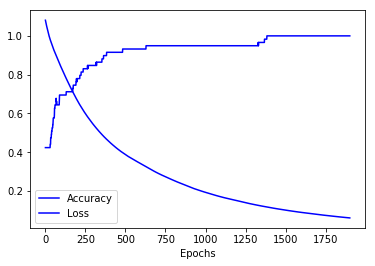

In [21]:
#plot loss and accuracy of the model

%matplotlib inline
import matplotlib.pyplot as plt

loss_val=[]
acc_val=[]
for h in histories:
    loss_val.extend(list(h['loss']))
    acc_val.extend(list(h['acc']))

epochs_index=range(1,len(acc_val)+1)

plt.plot(epochs_index,acc_val,'b',label='Accuracy')
plt.plot(epochs_index,loss_val,'b',label='Loss')
plt.xlabel("Epochs")
plt.legend()
plt.show()


In [24]:

#used for recognizing new samples
def onOSC_Input(path, tags, args, source):
    X=args[0]
    Y=args[1]
    sample=[X,Y]
    res=model.predict(np.array([sample]))
    res=np.argmax(res)
    msg=OSCMessage("/output/point")
    msg.append([X,Y,res])
    client.send( msg )  
server.addMsgHandler( "/inputs/point", onOSC_Input )
OSCHelper.start_server(server)


KeyboardInterrupt: 

In [29]:
#shudown server
server.close()
client.close()